In [1]:
print("We are using LSTM to predict and generate the next word.")

We are using LSTM to predict and generate the next word.


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

import pickle
import numpy as np
import pandas as pd
import os

In [3]:
from google.colab import files
uploaded = files.upload()

Saving input.txt to input.txt


**Load and Preprocess the data**

In [4]:
file = open("input.txt" , "r" , encoding = "utf8")

# storing file in list
lines = []
for i in file:
    lines.append(i)

# Converting list to string
data  = ""
for i in lines:
    data = ' '.join(lines)

# replacing unnecessary stuff with space
data = data.replace('\n' ,  ' ').replace('\r', ' ').replace('\ufeff' , ' ').replace('“', ' ').replace('”', ' ' )

#remove unnecessary spaces
data = data.split()
data = ' '.join(data)
data[:500]

'"Well, Prince, so Genoa and Lucca are now just family estates of the Buonapartes. But I warn you, if you don\'t tell me that this means war, if you still try to defend the infamies and horrors perpetrated by that Antichrist--I really believe he is Antichrist--I will have nothing more to do with you and you are no longer my friend, no longer my \'faithful slave,\' as you call yourself! But how do you do? I see I have frightened you--sit down and tell me all the news." It was in July, 1805, and the s'

check the length of the data used for pre-processinng


In [5]:
len(data)

141763

**Apply Tokenization:**

In [6]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

#saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl' , 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[64, 25, 38, 1135, 2, 1136, 40, 72, 94, 330, 1736, 5, 1, 1737, 20]

In [7]:
len(sequence_data)

25189

In [8]:
vocab_size = len(tokenizer.word_index) +  1
print(vocab_size)

3592


In [9]:
sequences = []

for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)

print("The length of the sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The length of the sequences are:  25186


array([[  64,   25,   38, 1135],
       [  25,   38, 1135,    2],
       [  38, 1135,    2, 1136],
       [1135,    2, 1136,   40],
       [   2, 1136,   40,   72],
       [1136,   40,   72,   94],
       [  40,   72,   94,  330],
       [  72,   94,  330, 1736],
       [  94,  330, 1736,    5],
       [ 330, 1736,    5,    1]])

In [10]:
X =[]
Y =[]
for i in sequences:
    X.append(i[0:3])
    Y.append(i[3])

X = np.array(X)
Y = np.array(Y)

In [11]:
print("Data:   ", X[:10])
print("Response:   ", Y[:10])

Data:    [[  64   25   38]
 [  25   38 1135]
 [  38 1135    2]
 [1135    2 1136]
 [   2 1136   40]
 [1136   40   72]
 [  40   72   94]
 [  72   94  330]
 [  94  330 1736]
 [ 330 1736    5]]
Response:    [1135    2 1136   40   72   94  330 1736    5    1]


In [12]:
Y = to_categorical(Y, num_classes = vocab_size)
Y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

**Creating the model**

In [13]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))

#feeding it into the LSTM layer
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))

#Defining  our neural network pattern
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             35920     
                                                                 
 lstm (LSTM)                 (None, 3, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 3592)              3595592   
                                                                 
Total params: 16680512 (63.63 MB)
Trainable params: 16680512 (63.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# **Plotting our model**
*to know the detailed visual representation*

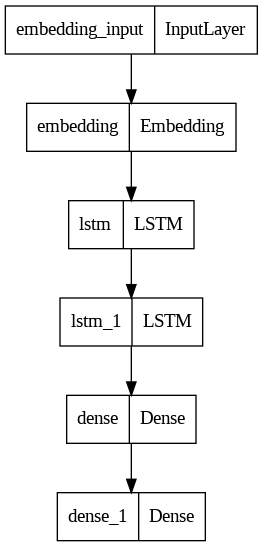

In [15]:
from tensorflow import keras
from keras.utils import plot_model
# Plotting the model for understanding
keras.utils.plot_model(model, to_file = 'plot.png', show_layer_names = True)

# Building our model

In [19]:
#Training the Model

from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy" , optimizer=Adam(learning_rate=0.001))
model.fit(X, Y, epochs=50, batch_size=64, callbacks=[checkpoint])

Epoch 1/50
394/394 [==============================] - ETA: 0s - loss: 4.2223
Epoch 1: loss improved from inf to 4.22230, saving model to next_words.h5
394/394 [==============================] - 13s 23ms/step - loss: 4.2223
Epoch 2/50
394/394 [==============================] - ETA: 0s - loss: 3.9137
Epoch 2: loss improved from 4.22230 to 3.91372, saving model to next_words.h5
394/394 [==============================] - 7s 18ms/step - loss: 3.9137
Epoch 3/50
394/394 [==============================] - ETA: 0s - loss: 3.6505
Epoch 3: loss improved from 3.91372 to 3.65050, saving model to next_words.h5
394/394 [==============================] - 7s 17ms/step - loss: 3.6505
Epoch 4/50
394/394 [==============================] - ETA: 0s - loss: 3.3661
Epoch 4: loss improved from 3.65050 to 3.36612, saving model to next_words.h5
394/394 [==============================] - 7s 17ms/step - loss: 3.3661
Epoch 5/50
394/394 [==============================] - ETA: 0s - loss: 3.0686
Epoch 5: loss improved

# Prediction

In [17]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

#loading the model and tokenizer
model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):
    sequence = tokenizer.texts_to_sequences([text])
    sequence = np.array(sequence)
    preds = np. argmax(model.predict(sequence))
    predicted_word = ""

    for key, value in tokenizer.word_index.items():
        if value == preds:
            predicted_word = key
            break

    print(predicted_word)
    return predicted_word

# *Output:*

In [18]:
while(1):
    text = input("Enter your line from the text file: ")
    if text == "0":
        print("Execution completed!")
        break
    else:
        try:
            text = text.split(" ")
            text = text[-3:]
            print(text)

            Predict_Next_Words(model, tokenizer, text)
        except Exception as e:
            print("Error occured:  ", e)
            continue

Enter your line from the text file: Hi I am
['Hi', 'I', 'am']
Error occured:   in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in 

KeyboardInterrupt: Interrupted by user